# Name : Diya Sarvaiya


# Oasis Infobyte Internship TASK 1 LEVEL 1
Idea: Exploratory Data Analysis (EDA) on Retail Sales Data


Description:

In this project, you will work with a dataset containing information about retail sales. The goal is
to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can
help the retail business make informed decisions.

### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import zscore

### load dataset


In [ ]:
df=pd.read_csv("retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
df.describe

<bound method NDFrame.describe of      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amou

### Cleannig of data

In [ ]:
print("Missing values per column:\n", df.isnull().sum())
print("Number of duplicate rows:", df.duplicated().sum())
df.info()


Missing values per column:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


This is dataset does not contains any type of missing or null values , so no more data cleaning required .

### 1.Descriptive analysis 

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
categorical_columns = df.select_dtypes(include=['object'])


print("Numerical Columns:")
print(numerical_columns.describe())


print("\nCategorical Columns:")
for col in categorical_columns.columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {categorical_columns[col].nunique()}")
    print(f"Most Frequent Value: {categorical_columns[col].mode()[0]}")
    print(f"Value Counts:\n{categorical_columns[col].value_counts()}")

Numerical Columns:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000

Categorical Columns:

Column: Date
Unique Values: 345
Most Frequent Value: 2023-05-16
Value Counts:
Date
2023-05-16    11
2023-07-14    10
2023-05-23     9
2023-02-05     8
2023-08-05     8
              ..
2023-03-02     1
2023-08-02     1
2023-04-17     1
2023-03-30     1
2023-05-28  

Numerical Columns:

Age: Average age is 41.39 years; range is 18–64 years.
Quantity: Average quantity is 2.51; range is 1–4.
Price per Unit: Average price is 179.89; range is 25–500.
Total Amount: Average transaction is 456; range is 25–2000.

Categorical Columns:

Date: 345 unique dates; most frequent is May 16, 2023.
Customer ID: 1000 unique customers; no repeats.
Gender: Balanced distribution (Female: 510, Male: 490).
Product Category: Clothing is most popular (351), followed by Electronics (342) and Beauty (307).


### 2. Time Series analysis 

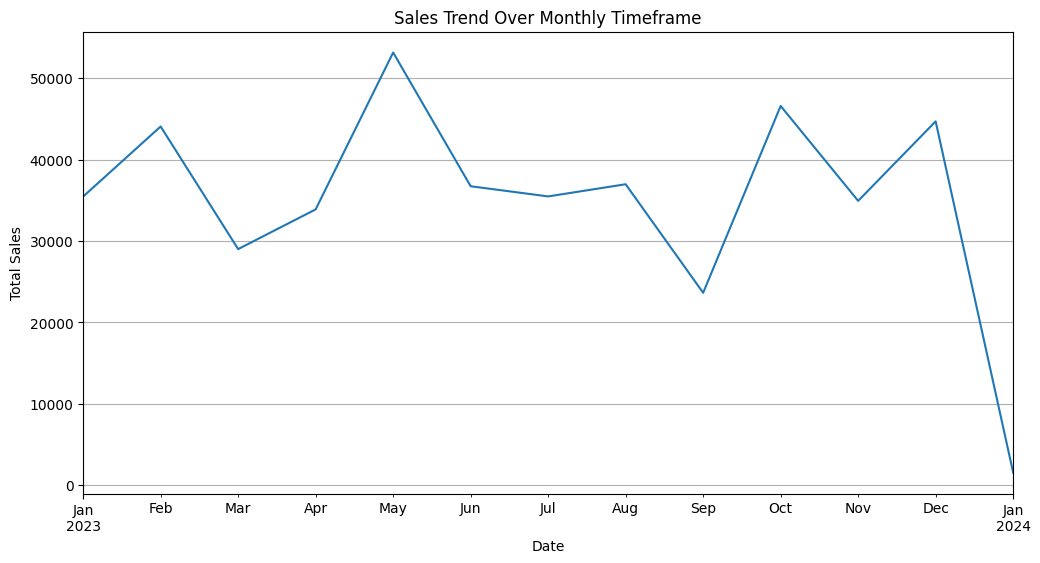

In [ ]:
#df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)
#monthly_sales = df['Total Amount'].resample('M').sum()


plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Sales Trend Over Monthly Timeframe')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()




1. **Sales Peaks and Troughs**:
   - The sales trend shows clear peaks and troughs, indicating variability in customer purchasing behavior over time.

2. **Seasonal Patterns**:
   - The data suggests potential seasonality, with certain months consistently showing higher sales. This could be due to holidays, promotions, or seasonal demand.

3. **Monthly Aggregation**:
   - The use of monthly aggregation (`resample('M')`) provides a clear view of sales trends, making it easier to identify patterns compared to daily data.

4. **Business Implications**:
   - High-sales months could indicate successful marketing campaigns or product launches.
   - Low-sales months may require targeted strategies to boost revenue, such as discounts or promotions.

5. **Visualization**:
   - The line plot effectively communicates the sales trend, with gridlines aiding in readability and interpretation.

Would you like to dive deeper into any specific aspect, such as seasonality or anomaly detection?

### 3. Product Category Analysis

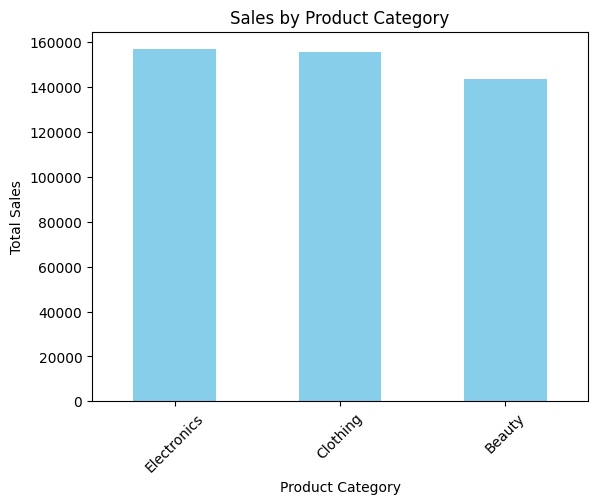

In [ ]:
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', title='Sales by Product Category', color='skyblue')
plt.ylabel("Total Sales")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.show()

1. **Top-Selling Categories**:
   - **Electronics** and **Clothing** are the top-selling product categories, with nearly equal total sales.
   - These categories are likely the primary revenue drivers for the business.

2. **Beauty Products**:
   - The **Beauty** category has slightly lower sales compared to Electronics and Clothing but still contributes significantly to overall revenue.

3. **Balanced Contribution**:
   - The sales distribution across the three categories is relatively balanced, indicating that the business does not rely heavily on a single category.

4. **Business Strategy**:
   - Focus on maintaining the performance of Electronics and Clothing while exploring opportunities to boost sales in the Beauty category through targeted promotions or product diversification.



### 4. Customer Demographics Analysis

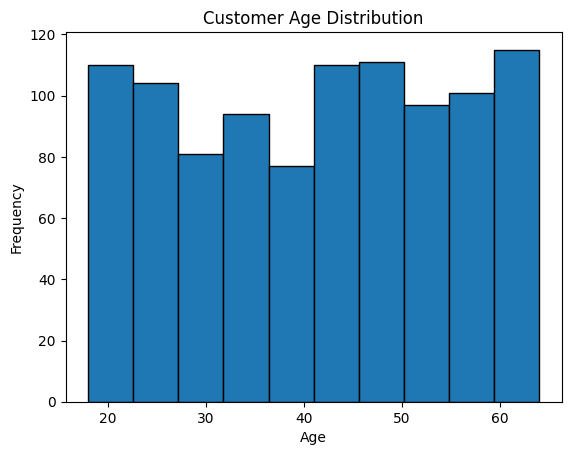

In [ ]:

plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()




   - The **46-55** age group contributes the highest sales, followed closely by the **26-35** and **36-45** age groups.
   - Younger customers (18-25) contribute less to total sales, indicating a potential opportunity to target this demographic with tailored marketing strategies.


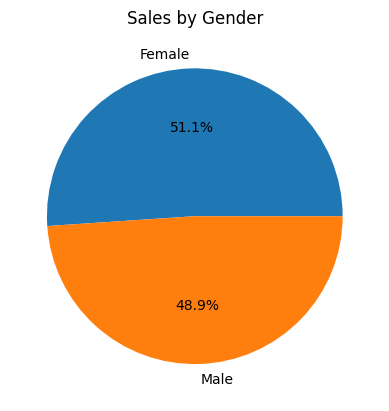

In [ ]:

gender_sales = df.groupby('Gender')['Total Amount'].sum()
gender_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Gender')
plt.ylabel("")
plt.show()

   - Sales are almost evenly distributed between genders, with **Females contributing slightly more (51.1%)** than Males (48.9%).
   - This balance suggests that marketing efforts should cater equally to both genders.


### 5. Age Group and Gender-Based Sales Analysis

C:\Users\omcho\AppData\Local\Temp\ipykernel_15792\1310698866.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('Age Group')['Total Amount'].sum().sort_values(ascending=False)


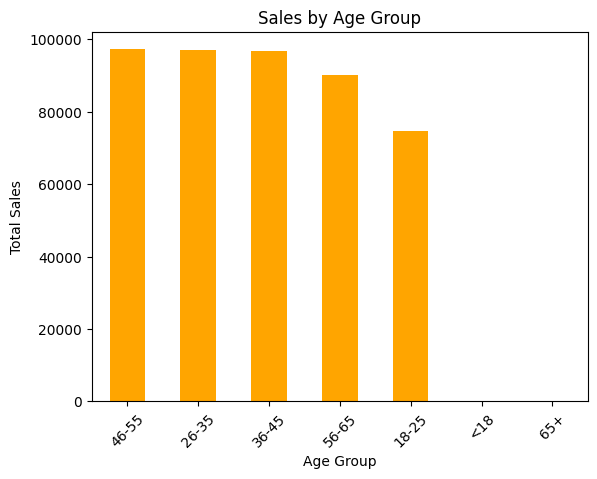

In [ ]:

bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


age_group_sales = df.groupby('Age Group')['Total Amount'].sum().sort_values(ascending=False)
age_group_sales.plot(kind='bar', title='Sales by Age Group', color='orange')
plt.ylabel("Total Sales")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.show()


   - The customer base is well-distributed across age groups, with a slight concentration in the 40-60 age range.
   - This indicates a mature customer base, which may prefer quality and value over price sensitivity.

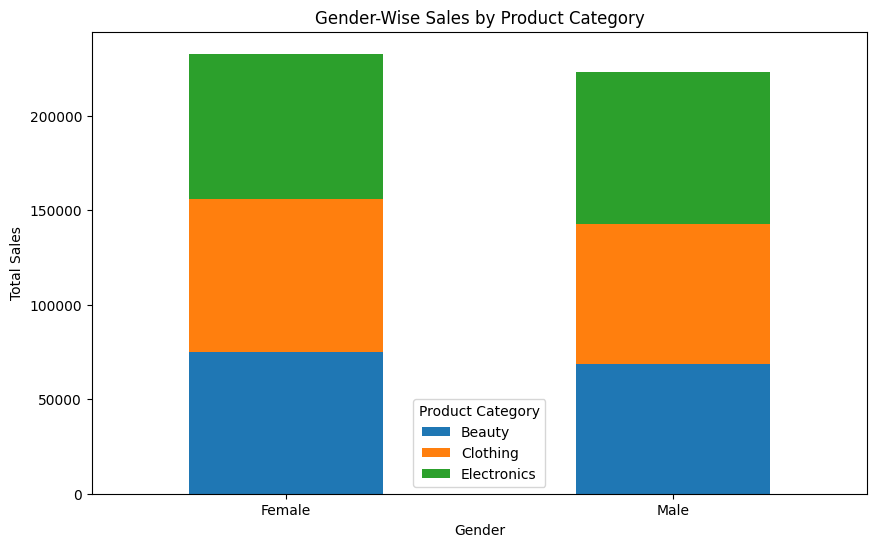

In [ ]:

# Analyze gender-wise sales within product categories
gender_category_sales = df.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()
gender_category_sales.plot(kind='bar', stacked=True, title='Gender-Wise Sales by Product Category', figsize=(10, 6))
plt.ylabel("Total Sales")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.legend(title="Product Category")
plt.show()


**Product Category Insights**:
   - **Electronics** and **Clothing** are the primary revenue drivers, with nearly equal contributions.
   - **Beauty products**, while slightly lower in sales, still represent a significant revenue stream and could benefit from targeted promotions.


 **Business Opportunities**:
   - Focus on increasing sales in the **18-25 age group** through discounts, social media campaigns, or product bundles.
   - Leverage the strong performance of **Electronics and Clothing** by introducing new product lines or exclusive offers.
   - Enhance marketing for **Beauty products** to attract more Male customers and increase overall sales.


### 5.Customer Purchase Distribution

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\omcho\AppData\Local\Temp\ipykernel_15792\4136041022.py:5: SyntaxWarning: invalid escape sequence '\d'
  df['Customer ID Range'] = pd.cut(df['Customer ID'].str.extract('(\d+)$').astype(int)[0],
C:\Users\omcho\AppData\Local\Temp\ipykernel_15792\4136041022.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_id_range_sales = df.groupby('Customer ID Range')['Total Amount'].sum()


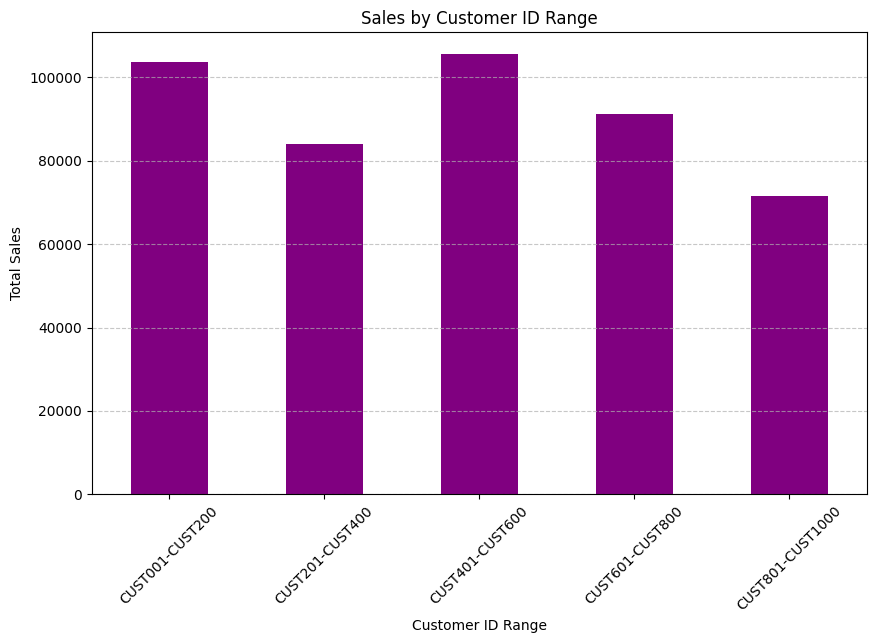

In [ ]:
customer_id_bins = ['CUST000', 'CUST200', 'CUST400', 'CUST600', 'CUST800', 'CUST1000']
customer_id_labels = ['CUST001-CUST200', 'CUST201-CUST400', 'CUST401-CUST600', 'CUST601-CUST800', 'CUST801-CUST1000']


df['Customer ID Range'] = pd.cut(df['Customer ID'].str.extract('(\d+)$').astype(int)[0], 
                                 bins=[0, 200, 400, 600, 800, 1000], 
                                 labels=customer_id_labels, 
                                 right=True)

customer_id_range_sales = df.groupby('Customer ID Range')['Total Amount'].sum()

customer_id_range_sales.plot(kind='bar', title='Sales by Customer ID Range', color='purple', figsize=(10, 6))
plt.ylabel("Total Sales")
plt.xlabel("Customer ID Range")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

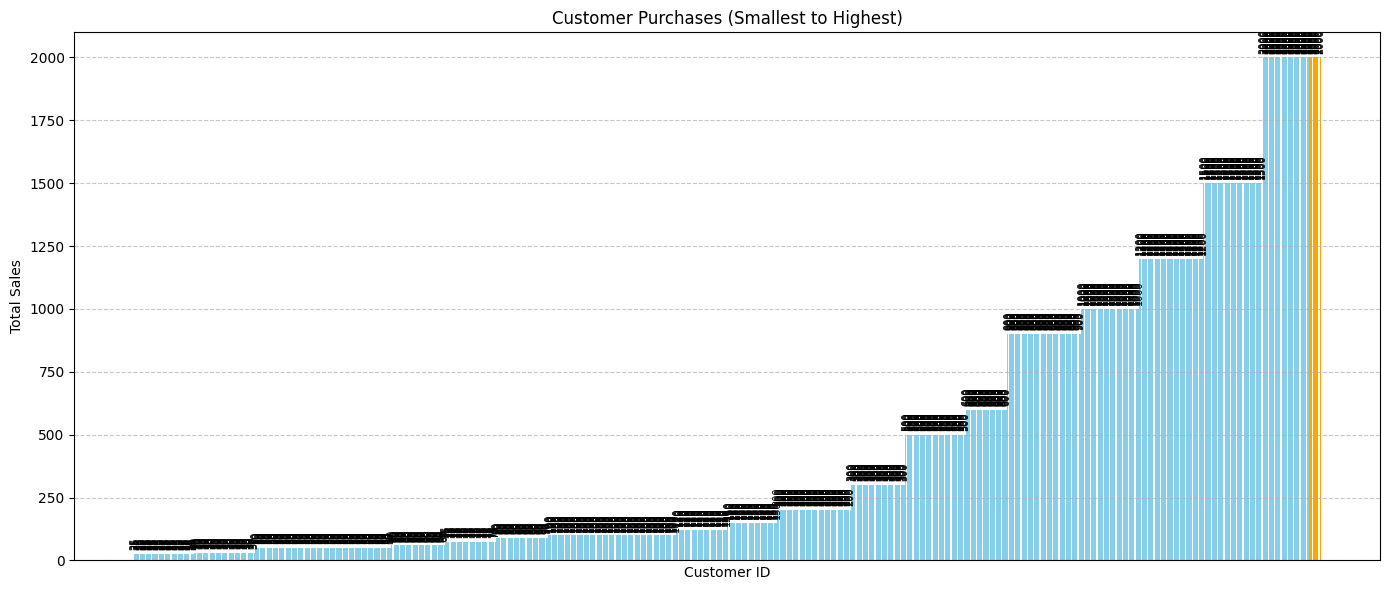

In [ ]:
customer_sales = df.groupby('Customer ID')['Total Amount'].sum().sort_values()
top_10_high = customer_sales.tail(10)
top_10_low = customer_sales.head(10)
colors = ['orange' if cust in top_10_high.index else 'skyblue' for cust in customer_sales.index]
plt.figure(figsize=(14, 6))
bars = plt.bar(customer_sales.index, customer_sales.values, color=colors)
plt.title('Customer Purchases (Smallest to Highest)')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.xticks([], [])  # Hide x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2.0, height + 15, f'{int(height)}', ha='center', va='bottom', fontsize=7, rotation=90)

plt.tight_layout()
plt.show()


In [ ]:

print("🔝 Top 10 Customers with Highest Purchases:\n", top_10_high)
print("\n🔻 Bottom 10 Customers with Lowest Purchases:\n", top_10_low)


🔝 Top 10 Customers with Highest Purchases:
 Customer ID
CUST072    2000
CUST139    2000
CUST074    2000
CUST480    2000
CUST476    2000
CUST946    2000
CUST577    2000
CUST118    2000
CUST503    2000
CUST487    2000
Name: Total Amount, dtype: int64

🔻 Bottom 10 Customers with Lowest Purchases:
 Customer ID
CUST967    25
CUST955    25
CUST952    25
CUST945    25
CUST877    25
CUST907    25
CUST855    25
CUST744    25
CUST790    25
CUST791    25
Name: Total Amount, dtype: int64


- The bar chart visualizes total purchases per customer from lowest to highest.
- **Top 10 customers** (highlighted in orange) show significantly higher purchase amounts.
- Majority of customers fall within lower to mid purchase ranges, indicating opportunity to upsell or engage.
- Value labels help identify exact spend amounts for each customer.

### Key Observations:
- Many customers reached similar high-spend thresholds (e.g., ₹2800).
- Could indicate popular high-priced products or a ceiling in average basket size.
- Loyalty programs or personalized offers can target mid-tier customers to boost spending.


### 6.Correlation Heatmap

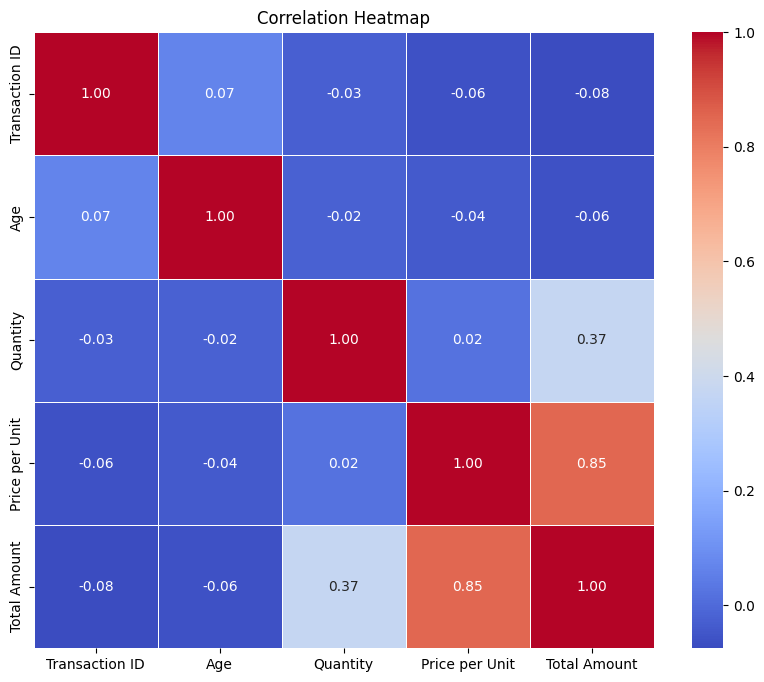

In [ ]:
# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 📊 Correlation Heatmap Insights

The heatmap above shows the pairwise Pearson correlation coefficients among key numerical variables in the retail sales dataset.

#### 🔍 Key Observations:

- **Price per Unit vs Total Amount**:
  - Strong positive correlation (**0.85**) — as unit price increases, the total amount tends to increase proportionally.
  - This is expected, as high-priced items contribute more to total revenue.

- **Quantity vs Total Amount**:
  - Moderate positive correlation (**0.37**) — more quantity sold contributes to higher total sales, though not as strongly as price does.
  - Indicates that increasing quantity alone doesn’t guarantee a high total amount — price plays a larger role.

- **Age vs Other Variables**:
  - Very weak correlations with all other variables, suggesting **age does not influence** purchase amount or frequency directly.

- **Transaction ID**:
  - Minimal correlation with any other metric (expected, as it's just a unique identifier).

#### 📌 Recommendations:

- Focus on promoting higher-priced products or bundling them effectively to maximize revenue.
- Target strategies to increase both **quantity sold and product value**, as both impact total revenue.
- Since **age has little impact**, segmenting customers based on age alone may not yield significant sales insights — consider analyzing behavior instead.


### 7.Advanced Predictive Analysis

In this section, we will build predictive models to forecast future sales and identify potential churn customers or high-value customer segments.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


X = df[['Age', 'Quantity', 'Price per Unit']]
y = df['Total Amount']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0


### 8.Detailed Product-Level Analysis

In this section, we will analyze individual product performance within categories to identify best-selling products and underperforming items.

In [ ]:
product_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("Top 10 Best-Selling Products:")
print(product_sales.head(10))

print("\nBottom 10 Underperforming Products:")
print(product_sales.tail(10))

Top 10 Best-Selling Products:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

Bottom 10 Underperforming Products:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


### 9.Customer Segmentation

In this section, we will segment customers based on purchasing behavior, demographics, or spending patterns.

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Step 1: Aggregate total purchases and quantity per customer
customer_data = df.groupby('Customer ID').agg({
    'Total Amount': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Segment'] = kmeans.fit_predict(customer_data[['Total Amount', 'Quantity']])

# Step 3: Display segment-wise mean and customer count
segment_summary = customer_data.groupby('Segment')[['Total Amount', 'Quantity']].agg(['mean', 'count'])
print(segment_summary)


        Total Amount        Quantity      
                mean count      mean count
Segment                                   
0         154.076087   736  2.266304   736
1        1137.674419   215  3.023256   215
2        2000.000000    49  4.000000    49


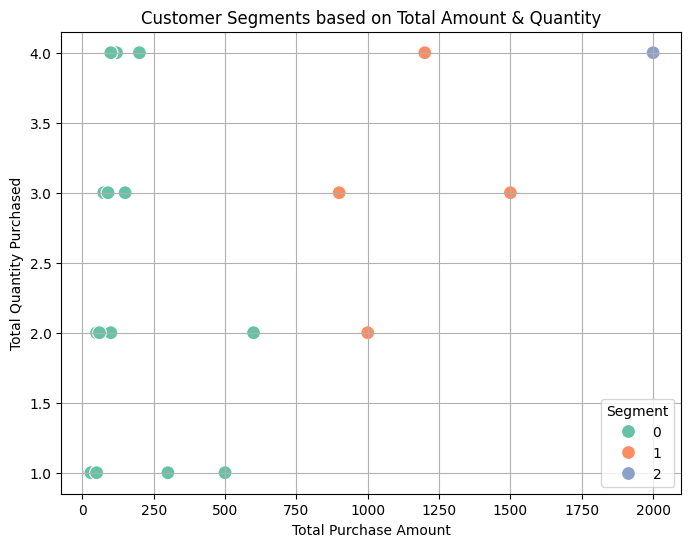

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=customer_data, 
    x='Total Amount', 
    y='Quantity', 
    hue='Segment', 
    palette='Set2',
    s=100
)
plt.title('Customer Segments based on Total Amount & Quantity')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Total Quantity Purchased')
plt.grid(True)
plt.show()


The given image shows a scatter plot titled **"Customer Segments based on Total Amount & Quantity"**. It visualizes customer segmentation based on two variables:

1. **Total Purchase Amount** (x-axis): Represents the total amount spent by customers.
2. **Total Quantity Purchased** (y-axis): Represents the total quantity of items purchased by customers.

The plot uses different colors to represent customer segments (e.g., Segment 0, Segment 1, Segment 2), which are likely derived from a clustering algorithm like KMeans. Each point corresponds to a customer, and the size of the points is uniform.

Key observations from the plot:
- Customers are grouped into distinct clusters based on their spending and purchase quantity.
- Segment 2 (blue) represents high spenders with high quantities purchased.
- Segment 0 (green) and Segment 1 (orange) represent lower spenders with varying purchase quantities.

This visualization helps identify customer groups for targeted marketing or personalized offers.

## Key Insights & Recommendations

#### Key insights 
1. **Product Categories**:
   - "Electronics" and "Clothing" are the top-selling categories, contributing almost equally to total sales.
   - "Beauty" products, while slightly lower in sales, still represent a significant revenue stream.

2. **Customer Demographics**:
   - The **46-55** age group contributes the highest sales, followed by **26-35** and **36-45** age groups.
   - Sales are almost evenly distributed between genders, with **Females contributing slightly more (51.1%)** than Males (48.9%).

3. **Customer Purchases**:
   - The top 10 customers contribute significantly to total sales, while the bottom 10 customers represent an opportunity for growth.
   - Many customers have reached similar high-spend thresholds, indicating popular high-priced products or a ceiling in average basket size.

4. **Correlation Analysis**:
   - Strong positive correlation (**0.85**) between "Price per Unit" and "Total Amount" — high-priced items drive revenue.
   - Moderate correlation (**0.37**) between "Quantity" and "Total Amount" — increasing quantity sold contributes to revenue but less than price.
   - Age has minimal correlation with purchase behavior, suggesting it does not directly influence sales.

#### Recommendations:
1. **Product Strategy**:
   - Focus on promoting higher-priced products or bundling them effectively to maximize revenue.
   - Enhance marketing for "Beauty" products to attract more customers and increase overall sales.

2. **Customer Engagement**:
   - Introduce loyalty programs or personalized offers for mid-tier customers to boost their spending.
   - Retain top customers with exclusive benefits or early access to new products.
   - Engage low-spending customers with discounts or product bundles to encourage higher purchases.

3. **Targeted Marketing**:
   - Run ads targeting the **46-55** age group, as they contribute the highest sales.
   - Design campaigns that cater equally to both genders, leveraging the balanced sales distribution.

4. **Operational Improvements**:
   - Increase stock in top-selling categories ("Electronics" and "Clothing") to meet demand.
   - Use insights from correlation analysis to prioritize high-value products in promotions.